# Performing principle component analysis

Let's now have a closer look at PCA. First, import some packages:

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from pandas.plotting import scatter_matrix
import matplotlib.cm as cm
from random import randint

## The dataset

Then, load the breast cancer dataset and normalize it for use with PCA:

In [2]:
data = datasets.load_breast_cancer()

X = data.data
y = data.target

X = normalize(X)

data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

# Applying PCA

In [3]:
pca = PCA()
pca.fit(X)
pca = PCA()
pca.fit(X)

# The new variable contains the transformed data, i.e., it will have as many columns as PCs generated.
# All observations are reconstructed by weighing the values for their variables according to the correlation of that
# variable with the PC
X_2 = pca.transform(X) # X transformed values

In [4]:
#how many components were computed
pca.n_components_

30

## Visualization

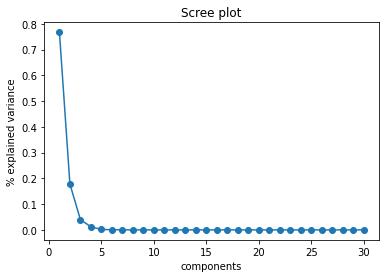

In [5]:
plt.plot(range(1, len(pca.components_)+1), pca.explained_variance_ratio_,'-o')
plt.xlabel('components')
plt.ylabel('% explained variance')
plt.title('Scree plot')
plt.show()

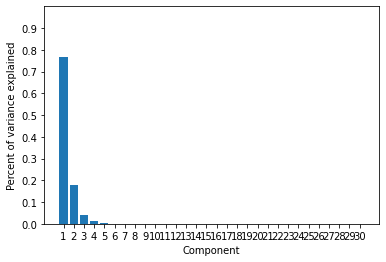

In [6]:
import numpy as np
plt.bar(range(1,31), pca.explained_variance_ratio_)
plt.xlabel('Component')
plt.xticks(range(1,31))
plt.ylabel('Percent of variance explained')
plt.ylim(0,1)
plt.yticks(np.arange(0, 1, step=0.1))
plt.show()

In [7]:
pca.explained_variance_ratio_

array([7.67090446e-01, 1.77918100e-01, 3.97447000e-02, 1.21323839e-02,
       1.89238926e-03, 6.16640022e-04, 4.67621213e-04, 6.84542700e-05,
       3.27044350e-05, 2.56702537e-05, 6.70300358e-06, 1.87199560e-06,
       8.80385865e-07, 5.90159967e-07, 2.37659151e-07, 1.84750375e-07,
       1.31092755e-07, 1.08599488e-07, 6.86133617e-08, 3.55153585e-08,
       2.50629790e-08, 2.07190113e-08, 1.30113743e-08, 8.31064009e-09,
       4.73304521e-09, 3.98230181e-09, 1.62917314e-09, 9.04451272e-10,
       7.05232041e-10, 3.03289474e-10])

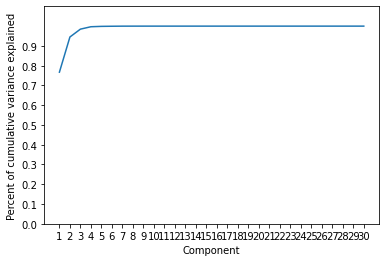

In [8]:
plt.plot(range(1,31), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Component')
plt.xticks(range(1,31))
plt.ylabel('Percent of cumulative variance explained')
plt.ylim(0,1.1)
plt.yticks(np.arange(0, 1, step=0.1))
plt.show()

Let's do PCA with a limited number of components:

In [9]:
pca = PCA(n_components=3)
pca.fit(X)
X_2 = pca.transform(X)

In [10]:
X_2[0,1]

0.034491068162521454

Then plot the PCs against each other:

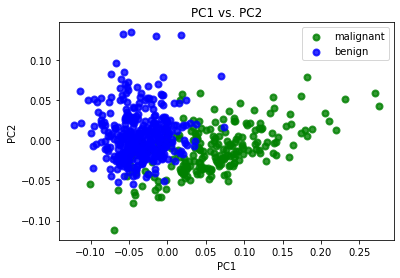

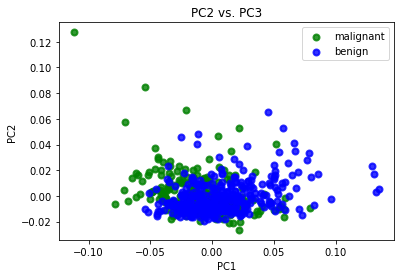

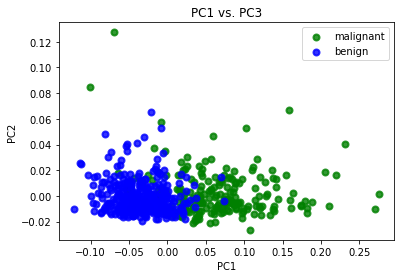

In [11]:
colors = ['green', 'blue', 'red']
lw = 2

for color, i, target_name in zip(colors, [0,1,2],data.target_names):
    plt.scatter(X_2[y==i, 0], X_2[y==i, 1], color=color, alpha=0.8, lw=lw,
               label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PC1 vs. PC2')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# Plot 2
for color, i, target_name in zip(colors, [0, 1, 2],data.target_names):
    plt.scatter(X_2[y == i, 1], X_2[y == i, 2], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PC2 vs. PC3')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# Plot 3
for color, i, target_name in zip(colors, [0, 1, 2],data.target_names):
    plt.scatter(X_2[y == i, 0], X_2[y == i, 2], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PC1 vs. PC3')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()    

## Plotting loadings

Finally, plot the variables' loadings (component weights scaled according to the variance explained by the PC):

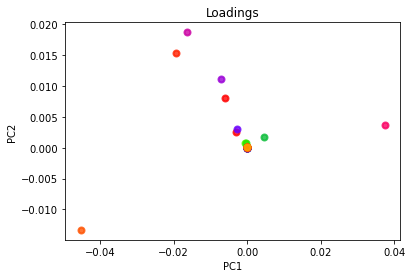

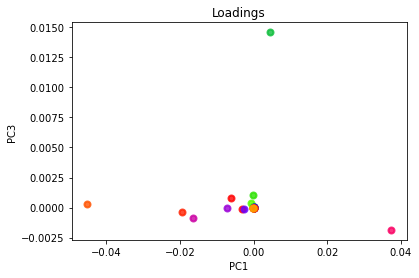

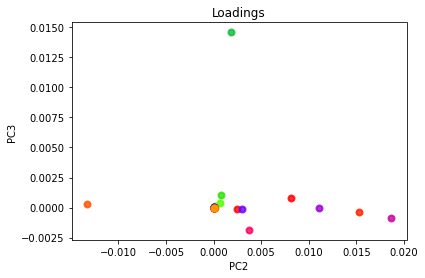

In [13]:
# Notice how I use a color map to make sure the variables are colored diffently, but consequently over the 3 graphs

for i in range(0, len(pca.components_[0])):
    pca_0_loadings = pca.components_[0, i] * np.sqrt(pca.explained_variance_[0])
    pca_1_loadings = pca.components_[1, i] * np.sqrt(pca.explained_variance_[1])
    plt.scatter(pca_0_loadings, pca_1_loadings, color=cm.prism(i), alpha=0.8, lw=lw)
plt.title('Loadings')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

for i in range(0, len(pca.components_[0])):
    pca_0_loadings = pca.components_[0, i] * np.sqrt(pca.explained_variance_[0])
    pca_2_loadings = pca.components_[2, i] * np.sqrt(pca.explained_variance_[2])
    plt.scatter(pca_0_loadings, pca_2_loadings,color=cm.prism(i), alpha=.8, lw=lw,
                )
plt.title('Loadings')
plt.xlabel("PC1")
plt.ylabel("PC3")
plt.show()

for i in range(0,len(pca.components_[0])):
    pca_1_loadings = pca.components_[1, i] * np.sqrt(pca.explained_variance_[1])
    pca_2_loadings = pca.components_[2, i] * np.sqrt(pca.explained_variance_[2])
    plt.scatter(pca_1_loadings, pca_2_loadings,color=cm.prism(i), alpha=.8, lw=lw,
                )
plt.title('Loadings')
plt.xlabel("PC2")
plt.ylabel("PC3")
plt.show()

In [15]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
components_columns = ['PC' +str(x) for x in range(1, len(pca.components_)+1)]
loadings_df = pd.DataFrame(loadings, columns=components_columns, index=data.feature_names)
loadings_df

,PC1,PC2,PC3
mean radius,-0.003132,2.455608e-03,-7.900905e-05
mean texture,-0.006059,8.093084e-03,7.854724e-04
mean perimeter,-0.019477,1.528530e-02,-3.355109e-04
mean area,-0.045287,-1.331067e-02,2.813785e-04
mean smoothness,-0.000033,4.279134e-05,4.162037e-06
mean compactness,-0.000017,3.601684e-05,8.371449e-06
mean concavity,0.000005,1.296042e-05,1.321472e-05
mean concave points,0.000004,5.067313e-08,4.253977e-06
mean symmetry,-0.000064,8.257343e-05,1.241199e-05
mean fractal dimension,-0.000025,3.258071e-05,3.382690e-06


In [18]:
abs(loadings_df['PC1']).sort_values(ascending=False)

mean area                  0.045287
worst area                 0.037417
mean perimeter             0.019477
worst perimeter            0.016473
worst texture              0.007168
mean texture               0.006059
area error                 0.004487
mean radius                0.003132
worst radius               0.002652
texture error              0.000583
perimeter error            0.000218
worst symmetry             0.000085
mean symmetry              0.000064
worst smoothness           0.000042
mean smoothness            0.000033
worst fractal dimension    0.000027
radius error               0.000026
mean fractal dimension     0.000025
mean compactness           0.000017
worst compactness          0.000016
worst concavity            0.000010
symmetry error             0.000010
concavity error            0.000009
compactness error          0.000008
mean concavity             0.000005
mean concave points        0.000004
smoothness error           0.000004
concave points error       0

Notice how, e.g., the dark green variable seems to be dominating the third component and does not interact with the others (close to 0 for both PC1 and PC2). Other, like the orange variable on the left seems to have an effect on both PC1 and PC2, but not on PC3. This way, we can learn more about the variables' effect on the PCs, and hence the overall explained variance.